## Boosting Techniques | Assignment

## Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners

-

## **Introduction**

**Boosting** is an **ensemble learning technique** in Machine Learning that aims to create a **strong predictive model** by combining multiple **weak learners** (usually simple models like shallow decision trees).  
The idea is to train these weak learners **sequentially**, where each new model focuses on the **errors made by the previous ones**.  

This step-by-step improvement process helps the ensemble achieve **high accuracy** and **better generalization** than any single model alone.

---

## **Key Idea Behind Boosting**

The main concept of boosting is to **convert weak learners into strong learners** by giving more importance to **data points that were misclassified** in previous iterations.  

Initially, all data points are given **equal weight**. After each round:
- The model identifies the samples it predicted incorrectly.  
- The algorithm **increases the weights** of those misclassified samples so that the next learner focuses more on them.  
- This process continues, with each new model correcting the mistakes of the earlier ones.  

Finally, the predictions from all models are **combined (usually weighted)** to form the final strong model.

---

## **How Boosting Works (Step-by-Step)**

1. **Initialize Weights:**  
   - Assign equal weights to all training samples.

2. **Train Weak Learner:**  
   - Train a simple base model (e.g., a small decision tree) on the data.

3. **Evaluate Errors:**  
   - Check which samples were classified incorrectly by the model.

4. **Update Weights:**  
   - Increase weights of misclassified samples so that the next model focuses more on difficult cases.

5. **Combine Models:**  
   - After several rounds, combine all the weak learners into a single **strong learner**, usually using a weighted voting or weighted sum approach.






## Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?




## **Introduction**

Both **AdaBoost** (Adaptive Boosting) and **Gradient Boosting** are popular **boosting algorithms** used in ensemble learning.  
Although they share the same goal — **to combine multiple weak learners** (like shallow decision trees) into a strong predictive model —  
they differ in **how they train** and **update** their weak learners during the boosting process.

---

## **1. Core Idea**

| Aspect | **AdaBoost (Adaptive Boosting)** | **Gradient Boosting** |
|:-------|:---------------------------------|:----------------------|
| **Main Principle** | Focuses on **adjusting sample weights** based on previous errors. | Focuses on **reducing residual errors** (gradients) from the previous model. |
| **Objective** | Emphasizes **misclassified samples** by increasing their weights. | Fits the next model to the **residuals (errors)** of the previous model. |

---

## **2. How Models Are Trained (Step-by-Step)**

### **➡ AdaBoost Training Process**
1. **Initialize sample weights** equally for all training examples.  
2. **Train a weak learner** (e.g., a decision stump).  
3. **Compute error** for that model — find how many samples were misclassified.  
4. **Increase weights** of misclassified samples so that the next learner focuses more on difficult cases.  
5. **Compute model weight (α)** based on its accuracy — better models get higher influence in the final prediction.  
6. **Combine models** using a **weighted majority vote** (for classification) or **weighted average** (for regression).

**Key Idea:**  
AdaBoost works by **re-weighting samples**, not by fitting to residuals.

---

### **➡ Gradient Boosting Training Process**
1. **Start with an initial prediction** (like the mean of the target values).  
2. **Compute residuals** — the difference between actual values and the current model’s predictions.  
3. **Train the next weak learner** to predict these residuals (errors).  
4. **Add the new model’s predictions** (scaled by a learning rate) to the ensemble.  
5. **Repeat** until the model performance stops improving or a set number of learners is reached.

 **Key Idea:**  
Gradient Boosting works by **fitting new models to the residual errors** — effectively performing gradient descent in function space.

---

## **3. Error Handling**

| Aspect | **AdaBoost** | **Gradient Boosting** |
|:-------|:--------------|:----------------------|
| **Error focus** | Increases weights of misclassified samples. | Minimizes the residual (error) using gradient descent. |
| **Loss function** | Exponential loss (for classification). | Can use any differentiable loss function (e.g., Mean Squared Error, Log Loss). |

---

## **4. Model Combination**

- **AdaBoost:**  
  Combines models using **weighted voting** (classification) or **weighted sum** (regression).

- **Gradient Boosting:**  
  Combines models **additively** by summing up all predictions (each scaled by a learning rate).

---

## **5. Learning Rate**

- **AdaBoost:**  
  Implicitly controlled through model weights — no explicit learning rate parameter.  
- **Gradient Boosting:**  
  Includes an explicit **learning rate (shrinkage parameter)** that controls how much each new model contributes.

---






## Question 3: How does regularization help in XGBoost?

# Question 3: How Does Regularization Help in XGBoost?

---

## **Introduction**

**XGBoost (Extreme Gradient Boosting)** is an advanced implementation of gradient boosting that is designed for **speed, performance, and control over overfitting**.  
One of the major reasons XGBoost performs so well compared to traditional gradient boosting is its built-in support for **regularization**.

Regularization in XGBoost helps improve **model generalization** by preventing the model from becoming too complex and overfitting to training data.

---

## **1. What is Regularization?**

**Regularization** is a technique used in machine learning to **penalize model complexity**.  
It adds a **penalty term** to the model’s objective function so that the model not only minimizes prediction errors but also keeps the learned parameters simple and small.

In simpler terms:  
> Regularization discourages the model from fitting noise and forces it to focus on the most important patterns.

---

## **2. XGBoost Objective Function**

XGBoost optimizes the following **regularized objective function**:

$$
\text{Obj} = \sum_{i=1}^{n} l(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
$$

**where:**
- \( l(y_i, \hat{y}_i) \): Loss function (e.g., mean squared error, log loss)  
- \( \Omega(f_k) \): Regularization term for each tree \( f_k \)  
- \( K \): Number of trees in the model  

The regularization term is defined as:

$$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T} w_j^2
$$

**Here:**
- \( T \): number of leaves (terminal nodes) in the tree  
- \( w_j \): weight (score) assigned to leaf \( j \)  
- \( \gamma \): penalty for the number of leaves (controls tree depth)  
- \( \lambda \): L2 regularization term (controls weight magnitude)
)


## **3. Types of Regularization in XGBoost**

### **(a) L2 Regularization (Ridge Regularization)**
- Represented by **λ (lambda)**.  
- Penalizes large leaf weights by adding the term \( \frac{1}{2} \lambda \sum w_j^2 \).  
- Helps smooth the model and reduces variance.

🧠 *Effect:* Prevents any single leaf from having a dominant influence and keeps the model stable.

---

### **(b) L1 Regularization (Lasso Regularization)**
- Represented by **α (alpha)**.  
- Penalizes the absolute value of leaf weights: \( \alpha \sum |w_j| \).  
- Encourages sparsity — pushes some leaf weights to **zero**, effectively performing **feature selection**.

🧠 *Effect:* Simplifies the model by ignoring unimportant splits or features.

---

### **(c) Tree Complexity Penalty (γ – Gamma)**
- Adds a fixed penalty for each additional leaf in the tree.  
- Controls tree **depth** and **complexity**.  
- A larger γ value means the algorithm will only add a leaf if it **improves the model significantly**.

🧠 *Effect:* Prevents overfitting by stopping unnecessary growth of trees.

---

## **4. How Regularization Helps XGBoost**

| **Aspect** | **Without Regularization** | **With Regularization** |
|-------------|-----------------------------|---------------------------|
| **Model Complexity** | Can create very deep trees that overfit | Penalizes deep or overly complex trees |
| **Generalization** | May fit noise in training data | Learns patterns that generalize better |
| **Feature Selection** | Uses all features | Ignores less important features (via L1) |
| **Stability** | Sensitive to small data changes | More stable and robust predictions |

---

## **5. Parameters Related to Regularization in XGBoost**

| Parameter | Type | Purpose |
|:-----------|:------|:----------|
| `lambda` | L2 Regularization | Reduces large leaf weights (default = 1) |
| `alpha` | L1 Regularization | Encourages sparsity and feature selection (default = 0) |
| `gamma` | Tree Complexity Penalty | Controls how much gain a split must achieve to be added (default = 0) |
| `max_depth` | Structural Constraint | Limits tree depth to prevent overfitting |
| `min_child_weight` | Structural Constraint | Minimum sum of instance weights in a leaf; prevents overly specific splits |

---

## **6. Example Explanation**

Suppose XGBoost is building a model to predict loan defaults:
- Without regularization, it may create a **very deep tree** that perfectly fits the training data, including noise.  
- With regularization:
  - The **L2 penalty** keeps leaf weights smaller, preventing extreme predictions.  
  - The **gamma penalty** stops new branches unless they offer significant improvement.  
  - The **L1 penalty** eliminates weak or irrelevant features.




## Question 4: Why is CatBoost considered efficient for handling categorical data?




## **Introduction**

**CatBoost** (short for *Categorical Boosting*) is a high-performance **gradient boosting algorithm** developed by **Yandex** that is specifically designed to handle **categorical data efficiently**.  
In many real-world datasets, categorical variables such as *“Gender,” “Country,” “Education Level,” “Product Type,”* etc., play a major role in determining the output.  
Traditional machine learning algorithms often require **preprocessing** steps like **label encoding** or **one-hot encoding**, which can lead to **information loss**, **high dimensionality**, and **overfitting**.  

CatBoost, however, is unique because it can **natively process categorical features** without requiring extensive preprocessing. This built-in capability, combined with its innovative **ordered boosting** and **target statistics encoding**, makes it one of the most powerful algorithms for datasets containing categorical variables.

---

## **1. Native Handling of Categorical Variables**

### **Traditional Problem:**
In most machine learning algorithms (like XGBoost, LightGBM, or Random Forest), categorical variables must first be converted into numerical form since algorithms cannot process text or categories directly.

Common methods include:
- **Label Encoding** → Assigning an integer to each category (e.g., “Male” = 0, “Female” = 1)
- **One-Hot Encoding** → Creating binary columns for each category

However, these approaches have drawbacks:
- **Label Encoding** may imply a false ordinal relationship (e.g., “Red” < “Blue” < “Green”)
- **One-Hot Encoding** increases the **dimensionality** of the dataset, leading to **memory inefficiency** and slower training.

### **CatBoost’s Approach:**
CatBoost allows users to directly input categorical features into the model. The algorithm automatically converts these features internally using **efficient statistical methods**, eliminating the need for any manual encoding step.  
This results in:
- **Simpler preprocessing**
- **Reduced training time**
- **More accurate representation** of the underlying data relationships

---

## **2. Ordered Target Statistics (Mean Encoding without Leakage)**

CatBoost replaces categorical values with numerical statistics that represent their relationship with the target variable. However, unlike regular *mean encoding*, which can cause **target leakage**, CatBoost uses a unique technique called **Ordered Target Statistics**.

### **How it Works:**
- CatBoost first creates several **random permutations** of the training data.
- For each categorical feature and permutation, it computes the **average target value** for that feature using **only the samples that come before** the current one in the permutation.
- This ensures that **no information from the future (or target leakage)** influences the encoding of the current sample.

## **3. Combination of Categorical Features**

Many categorical variables interact in complex ways.  
For example:
- The relationship between **“City”** and **“Product Type”** might affect the target variable.
- A simple one-hot encoding would not capture such interactions automatically.

CatBoost addresses this by automatically creating **combinations of categorical features** (known as *feature crosses*) during training.  
It evaluates and constructs new features like:
- (“City”, “Product Type”)
- (“Gender”, “Education Level”), etc.

These interactions allow CatBoost to:
- Capture **non-linear relationships** between features
- Enhance **model expressiveness**
- Reduce the need for **manual feature engineering**

---

## **4. Handling High-Cardinality Categorical Features**

High-cardinality features are categorical columns with **many unique categories**, such as “Customer ID” or “Product Code.”  
Traditional one-hot encoding would create **thousands of binary columns**, consuming excessive memory and computational power.

CatBoost overcomes this challenge using:
- **Statistical encoding with hashing** to compress high-cardinality features efficiently
- **Ordered statistics** to ensure that each category’s numerical representation is **meaningful and stable**

Thus, CatBoost can train effectively even on datasets with **millions of categorical levels**.

---

## **5. Ordered Boosting: Preventing Overfitting**

In addition to ordered statistics for encoding, CatBoost also introduces **ordered boosting**, a novel variant of gradient boosting.

### **Problem in Traditional Boosting:**
Standard boosting algorithms may use the same dataset for both:
- Calculating gradients (errors)
- Fitting the next model (trees)

This can lead to **prediction shift**, where the model learns from its own prediction errors incorrectly, resulting in overfitting.


## Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?
# Datasets:
## ● Use sklearn.datasets.load_breast_cancer() for classification tasks.
## ● Use sklearn.datasets.fetch_california_housing() for regression tasks


# **Question 5: What Are Some Real-World Applications Where Boosting Techniques Are Preferred Over Bagging Methods?**

---

## **Introduction**

**Ensemble learning** combines multiple weak learners (models) to form a strong predictive model.  
Two popular ensemble methods are **Bagging** (Bootstrap Aggregating) and **Boosting**.

While **Bagging** (like Random Forest) focuses on **reducing variance** by training models independently on random subsets of data,  
**Boosting** (like AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost) focuses on **reducing bias** by sequentially training models that correct the errors of previous models.

Boosting techniques are preferred in many real-world applications because they provide:
- **Higher accuracy**
- **Better generalization**
- **Strong performance on complex, non-linear datasets**

---

## **1. Key Difference Between Bagging and Boosting**

| Feature | **Bagging (e.g., Random Forest)** | **Boosting (e.g., XGBoost, AdaBoost)** |
|----------|------------------------------------|-----------------------------------------|
| **Goal** | Reduce variance | Reduce bias and variance |
| **Training** | Models trained independently | Models trained sequentially |
| **Error Handling** | Equal weight to all samples | Focuses on misclassified samples |
| **Overfitting Risk** | Lower | Slightly higher (but controlled by regularization) |
| **Speed** | Faster | Slower but more accurate |
| **Best For** | Simple tasks, large datasets | Complex, imbalanced, and structured datasets |

---

## **2. Why Boosting is Preferred in Certain Applications**

Boosting techniques are particularly favored when:
- The dataset is **complex and non-linear**.
- Some classes are **harder to classify**.
- **High predictive accuracy** is critical (e.g., healthcare, finance).
- There are **structured/tabular datasets** with both numerical and categorical variables.

---

## **3. Real-World Applications of Boosting Techniques**

### **A. Healthcare — Disease Detection (Classification Task)**

- **Dataset Example:** `sklearn.datasets.load_breast_cancer()`
- **Goal:** Classify whether a tumor is **malignant** or **benign**.
- **Preferred Algorithm:** XGBoost, CatBoost, or AdaBoost.

#### **Why Boosting is Better:**
- Medical data often contains **imbalanced classes** (e.g., more benign cases than malignant).  
- Boosting assigns **higher weights to misclassified cases**, improving accuracy on minority classes.
- Provides **explainability** using feature importance (helpful for doctors).




In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Boosting model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.956140350877193


C:\Users\Lenovo\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:17:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Boosting Regressor
model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


RMSE: 0.47954250381653163


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Question 6: Write a Python program to:
## ● Train an AdaBoost Classifier on the Breast Cancer dataset
## ● Print the model accuracy

In [4]:


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train AdaBoost model
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("✅ AdaBoost Classifier Accuracy on Breast Cancer Dataset: {:.2f}%".format(accuracy * 100))


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


✅ AdaBoost Classifier Accuracy on Breast Cancer Dataset: 97.37%


## Question 7: Write a Python program to:
## ● Train a Gradient Boosting Regressor on the California Housing dataset
## ● Evaluate performance using R-squared score


In [6]:


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print results
print("✅ Gradient Boosting Regressor Performance:")
print("R-squared Score: {:.4f}".format(r2))


✅ Gradient Boosting Regressor Performance:
R-squared Score: 0.8185


## Question 8: Write a Python program to:
## ● Train an XGBoost Classifier on the Breast Cancer dataset
## ● Tune the learning rate using GridSearchCV
## ● Print the best parameters and accuracy


In [7]:


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Define parameter grid for learning rate tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train the model with grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy
print("✅ Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("✅ Model Accuracy on Test Set: {:.2f}%".format(accuracy * 100))


✅ Best Parameters: {'learning_rate': 0.3}
✅ Model Accuracy on Test Set: 95.61%


## Question 9: Write a Python program to:
## ● Train a CatBoost Classifier
## ● Plot the confusion matrix using seaborn

✅ CatBoost Classifier Accuracy: 96.49%


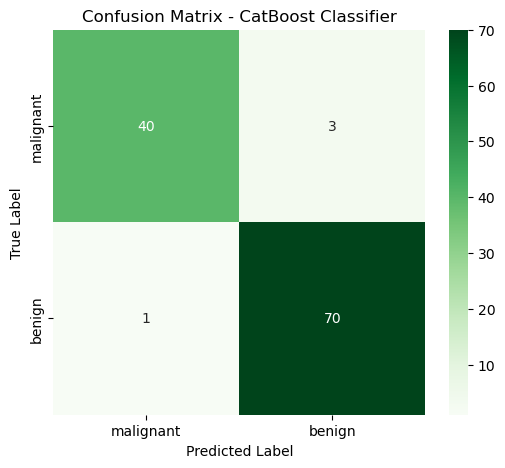

In [10]:


from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train CatBoost model
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=0,
    random_state=42
)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ CatBoost Classifier Accuracy: {:.2f}%".format(accuracy * 100))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("Confusion Matrix - CatBoost Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numeric and categorical features.
# Describe your step-by-step data science pipeline using boosting techniques:
## ● Data preprocessing & handling missing/categorical values
## ● Choice between AdaBoost, XGBoost, or CatBoost
## ● Hyperparameter tuning strategy
## ● Evaluation metrics you'd choose and why
## ● How the business would benefit from your model


# 1) Problem framing & high-level approach

Objective: Predict whether a customer will default on a loan (binary classification).

Constraints: Imbalanced target (defaults << non-defaults), missing values, mixed numeric + categorical features, regulatory/privacy concerns.

High-level plan: Build an end-to-end pipeline that: cleans data → engineers features → handles imbalance → trains + tunes a boosting model → evaluates using business-aware metrics → deploys with monitoring, interpretability and fairness checks.

# 2) Data preprocessing & handling missing / categorical values
2.1 Initial checks & housekeeping

Inspect distributions, data types, missingness patterns, unique counts for categorical columns, outliers.

Split data early into train / validation / test (e.g., 60/20/20) using stratified split on the target to preserve imbalance. Do this before heavy preprocessing to avoid leakage.

## 2.2 Missing values

Explore whether missingness is MCAR / MAR / MNAR.

Simple rules:

If a column has very high missingness (e.g., > 60–80%) consider dropping or deriving a missingness indicator.

For numeric features: impute using median (robust) or model-based imputation (KNN / IterativeImputer) if justified.

For categorical features: impute with a new category like "MISSING" (so model can learn missingness signal).

Important: When imputing, fit imputers only on training data and apply to val/test.

## 2.3 Categorical features

Two options:

CatBoost: pass categorical column names/indices directly and no encoding required — CatBoost uses ordered target statistics internally and handles high-cardinality effectively.

XGBoost / AdaBoost: must encode. Prefer:

Target/mean encoding with smoothing (carefully, with K-fold or out-of-fold to avoid leakage) for high-cardinality features.

One-hot for low-cardinality (< ~10 levels).

Frequency encoding or hashing when many categories.

Example of out-of-fold mean encoding (if using XGBoost): always compute encodings using training folds, apply to validation/test.

## 2.4 Feature engineering ideas (domain-specific)

Transaction behavior features: recent delinquency counts, avg monthly balance, max drawdown, velocity (transactions per day), time since last default/payment delay.

Aggregations: rolling means, decayed averages, transaction category ratios.

Interaction terms: e.g., income / monthly_payment, age * delinquency_rate.

Time features: days since account opening, seasonality flags.

Missingness indicators: is_alt_contact_missing, num_features_missing.

## 2.5 Scaling

Tree-based models (boosting) don’t need standard scaling for accuracy, but scaling can help interpretability or models used later (e.g., logistic baseline).

Save preprocessing pipeline (imputers, encoders, scalers) for production.

# 3) Choice between AdaBoost, XGBoost, or CatBoost
Recommendation (summary)

Primary choice: CatBoost — best when many categorical features (native handling, ordered encoding, robust to target leakage). Good default for tabular FinTech data.

Runner-up: XGBoost / LightGBM — extremely fast and well-tuned; use with careful categorical encoding (target encoding out-of-fold) and regularization. LightGBM is very fast for very large datasets.

AdaBoost — historically important, but less flexible and often outperformed by more modern gradient boosting frameworks (XGBoost/LightGBM/CatBoost). Use only for simple baselines or tiny datasets.

Rationale

FinTech data = many categorical variables (e.g., occupation code, merchant id), skewed distributions, possible high cardinality; CatBoost’s ordered target stats + categorical combinations reduce manual work and leakage risk.

XGBoost provides excellent control of regularization and speed; use when you need finer performance tuning and when you've prepared categorical encodings carefully.

# 5) Handling imbalanced data (class imbalance strategies)

Model-level:

Use scale_pos_weight (XGBoost) or class_weights (CatBoost supports auto_class_weights='Balanced' or manual weights).

Use objective or eval metric adapted for class imbalance (AUC, PR AUC).

Data-level:

Careful use of oversampling (SMOTE variants) on training set only — boosting models can be sensitive; sometimes simple class weighting is safer.

Undersampling may discard valuable majority-class data — use only if dataset huge.

Hybrid: small, targeted oversampling + class weights.

Threshold tuning: after predicting probabilities, choose operating point to balance business costs (precision/recall tradeoff) rather than default 0.5.

# 6) Hyperparameter tuning strategy
## 6.1 What to tune (suggested)

learning_rate (eta): 0.01 – 0.3

n_estimators / iterations: large with early stopping (500–5000)

max_depth / depth: 3–10

l2_leaf_reg (CatBoost) or reg_lambda/reg_alpha (XGBoost): regularization

subsample (row sampling), colsample_bytree (feature sampling)

min_child_weight / min_data_in_leaf

For CatBoost: bagging_temperature and random_strength

## 6.2 Practical search flow

Baseline + early stopping. Train a default model with early stopping to get baseline and appropriate number of iterations.

Coarse search (RandomizedSearch or Bayesian) over wide ranges to find promising areas (fewer evaluations, good coverage).

Refine with Bayesian optimization (e.g., Optuna, Hyperopt) or smaller GridSearch around best region.

Final fine-tuning: adjust learning_rate + increase n_estimators while monitoring validation AUC and overfitting.

Always use time/stratified CV appropriate for data (if temporal data, use time-based split; otherwise stratified k-fold).

## 6.3 Practical tips

Use AUC/PR AUC for scoring during search for imbalanced tasks (more on metrics below).

Use early stopping to avoid overfitting and to speed up tuning.

Use nested CV or a held-out test set to estimate generalization.

Use GPU for faster tuning if available.

# 7) Evaluation metrics (and why)

Because the dataset is imbalanced, accuracy is misleading. Use a mix of probability-based, classwise and business-aware metrics:

Primary metrics

ROC AUC (Area Under ROC): overall separability measure, robust to class imbalance in terms of ranking, but can overestimate performance when classes are extremely imbalanced.

PR AUC (Area Under Precision-Recall curve): more informative when positive class is rare; focuses on performance for the positive (default) class.

Secondary / operational metrics

Precision / Recall / F1 at chosen threshold: choose threshold to meet business recall/precision tradeoff.

Recall (sensitivity): proportion of actual defaulters caught — critical if missing defaulters is costly.

Precision: proportion of flagged defaulters who actually default — important to avoid false alarms and customer friction.

Confusion Matrix: raw counts for TP/FP/TN/FN.

Specificity (True Negative Rate) if false positives have costs.

Calibration (Brier score / calibration curve): ensures predicted probabilities match observed frequencies — important if probabilities are used in pricing decisions or risk scoring.

Cost-sensitive metrics: Define a business cost matrix (cost_fn * FN + cost_fp * FP) and compute expected cost (preferred approach — directly optimizes what the business cares about).

# 8) Model interpretability & fairness
Interpretability

Feature importance (CatBoost / XGBoost built-in).

SHAP values for local & global explanations — crucial for regulatory compliance and trust in FinTech.

Provide model explanations for rejected applicants (e.g., top contributing features).

Fairness & Bias Checks

Check performance (AUC, FPR/FNR) across demographic groups (age, gender, location) and ensure compliance with fair lending laws.

If disparities found, investigate data, re-balance, or use fairness-aware methods and document rationale.

# 9) Threshold selection and business decisioning

Choose operating threshold using validation set or cost-based analysis.

Example approaches:

Maximize F1 if want balance.

Maximize Recall subject to minimum Precision (business rule).

Minimize expected monetary loss using cost matrix.

# 10) Deployment, monitoring & feedback loop
Pre-deployment

Store model artifacts + preprocessing pipeline, versioned.

Save: model weights, feature list, encoders, training data schema.

Expose endpoint with prediction + probability + top-3 SHAP reasons.

Monitoring (post-deployment)

Data drift: monitor feature distributions (population stability index).

Model drift / performance: re-evaluate AUC/PR AUC on recent labeled data; track calibration shift.

Business KPIs: delinquency rates, approval rates, realized loss vs predicted risk.

Retraining policy: scheduled (monthly / quarterly) or triggered by drift/performance drop.

# 11) How the business benefits
Direct financial benefits

Reduced credit losses: better identification of likely defaulters reduces bad loans and associated provisioning.

Improved approval decisions: increase acceptance of low-risk borrowers (higher revenue) and stricter evaluation for high-risk.

Optimized pricing: use calibrated probabilities to set interest rates aligned to risk (risk-based pricing).

Operational benefits

Automation & speed: automated risk scoring speeds decisions and lowers manual review costs.

Better segmentation: create targeted interest/collections strategies (early intervention for borderline cases).

Resource allocation: focus collections and monitoring effort on accounts with high predicted default probability.

Compliance & reputation

Explainability (SHAP + feature importance) enables regulatory audits and reduces compliance risk.

Fairness checks reduce potential bias/legal exposure.

Strategic benefits

Competitive advantage: more accurate risk models enable aggressive but safe market expansion.

Product personalization: combine risk with profitability to tailor loan products.

# 12) Quick end-to-end checklist (actionable)

Split data (stratified) into train/val/test.

EDA & missingness analysis; create missing flags.

Impute (train-only) and engineer features (time windows, aggregates).

If using XGBoost, create out-of-fold mean encodings for categorical vars. If using CatBoost, pass categorical indices.

Train baseline CatBoost with early stopping, monitor AUC/PR AUC.

Handle imbalance with class weights or conservative oversampling + threshold tuning.

Hyperparameter tune with Random/ Bayesian search (optuna), optimizing PR AUC or business cost.

Evaluate: ROC AUC, PR AUC, precision/recall at business threshold, calibration.

Explain with SHAP, export explanations for top decisions.

Deploy, monitor drift, and retrain as needed.